Import all important stuff

In [90]:
import ssl

from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from bertopic.representation import KeyBERTInspired
import pandas as pd
import nltk
from datetime import datetime
from textblob import TextBlob
from textblob_de import TextBlobDE
from datasets import load_dataset

import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import importlib
import functions


import nbconvert

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [91]:
from functions import *
importlib.reload(functions)


<module 'functions' from 'c:\\Users\\Jacob\\OneDrive\\uni\\MA WiSoz\\Semester III\\Computational Social Sciences\\foPra\\functions.py'>

Load all data 

In [3]:
parties = ["CDU", "SPD", "FDP", "AFD", "LEFT", "GREENS"]


file_path = "C:/Users/Jacob/OneDrive/uni/MA WiSoz/Semester III/Computational Social Sciences/foPra/data/"


In [4]:
# Define a dictionary to assign RGB colors to each party
party_colors = {
    "CDU": (0, 0, 0),         # Black
    "SPD": (255, 0, 0),       # Red
    "FDP": (235, 235, 20),     # Yellow
    "AFD": (135, 206, 250),   # Sky Blue
    "LEFT": (128, 0, 128),    # Purple
    "GREENS": (0, 128, 0)     # Green
}

In [44]:
# Load the DataFrame from a pickle file
df_manifesto = pd.read_pickle('Manifesto_final.pkl') 

In [10]:
cmp_categories = pd.read_csv(file_path  + "cmp_categories.csv")

In [43]:
#topic_model = BERTopic.load("bertopic_model.pkl")
topic_model = BERTopic.load(file_path)


In [93]:
tm_df = topic_model.get_topic_info()

In [ ]:
# tm_200 = topic_model.reduce_topics(df_manifesto["text"], nr_topics=200)
# tm_400 = topic_model.reduce_topics(df_manifesto["text"], nr_topics=400)


In [ ]:
with open("topics_over_time.pkl", "rb") as f:
    topics_over_time = pickle.load(f)

In [7]:
# Load the topics from a pickle file
topics = pd.read_pickle('topics.pkl')

# Load the probabilities from a pickle file
probs = pd.read_pickle('probs.pkl')

#df_manifesto["topic"] = topics


In [45]:
economy = limit_to_cmp(df_manifesto, 400, 450)


Next: filter topics and codes to automatically code the topics.

In [47]:
topics_filter = get_topics(df_manifesto, cmp_categories)


In [85]:
list_topic_409 = topics_filter["Keynesian Demand Management"]
df_subset_409 = tm_df[tm_df['Topic'].isin(list_topic_409)]

In [46]:
topic_model.get_document_info(df_manifesto["text"])

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,Düsseldorf Leitsätz Juli wirtschaftlich sozial...,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
1,ersten Hälfte Jahr Tiefpunkt erreicht,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
2,Produkt Arbeitsmor Minimum abgesunken,1,1_arbeitsbedingungen_arbeitnehmerinnen arbeitn...,"[arbeitsbedingungen, arbeitnehmerinnen arbeitn...",NaN,arbeitsbedingungen - arbeitnehmerinnen arbeitn...,False
3,Kampf Ware Kampf Hunger führte rücksichtslosem...,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
4,Korrupt griff erschreckendem Maße,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
...,...,...,...,...,...,...,...
95678,nan,152,152_nan_nan nan_nan getan_nan etwa,"[nan, nan nan, nan getan, nan etwa, ei nan, na...",NaN,nan - nan nan - nan getan - nan etwa - ei nan ...,False
95679,liegt,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
95680,Wahlen entscheidet Gesellschaft darüber wer,30,30_wählerinnen wähler_wählerin lieber_lieber w...,"[wählerinnen wähler, wählerin lieber, lieber w...",NaN,wählerinnen wähler - wählerin lieber - lieber ...,False
95681,Wahlen Moment Freiheit,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False


In [ ]:
extract_topics(self, topic_model, documents, c_tf_idf, topics)


Inspect the data

In [96]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(df_manifesto["text"])


In [98]:
topic_model.visualize_hierarchy()

In [48]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,38779,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN
1,0,8594,0_kindern_kinderbetreuung_kindergeld_familien,"[kindern, kinderbetreuung, kindergeld, familie...",NaN
2,1,3254,1_arbeitsbedingungen_arbeitnehmerinnen arbeitn...,"[arbeitsbedingungen, arbeitnehmerinnen arbeitn...",NaN
3,2,2026,2_erneuerbaren energien_erneuerbar energien_au...,"[erneuerbaren energien, erneuerbar energien, a...",NaN
4,3,1986,3_sozial wohnungsbau_sozialen wohnungsbaus_soz...,"[sozial wohnungsbau, sozialen wohnungsbaus, so...",NaN
...,...,...,...,...,...
209,208,21,208_verbraucherschutzverbänd sollen_fördert ve...,"[verbraucherschutzverbänd sollen, fördert verb...",NaN
210,209,21,209_arbeitsmarkt steuerreform_steuerreform ent...,"[arbeitsmarkt steuerreform, steuerreform entbü...",NaN
211,210,21,210_verbesserung umweltpolitik_umweltpolitik s...,"[verbesserung umweltpolitik, umweltpolitik stä...",NaN
212,211,21,211_hoheitsverwaltung muß_möchten gesellschaft...,"[hoheitsverwaltung muß, möchten gesellschaftli...",NaN


Group and Compare Topics Across Parties
Your goal is to compare how political parties talk about different topics. You can:

Analyze topic distribution per party:

In [49]:
party_topic_counts = df_manifesto.groupby(["party", "topic"]).size().unstack().fillna(0)
party_topic_counts = party_topic_counts.div(df_manifesto.groupby("party")["party_count"].first(), axis=0)
party_topic_counts



topic,-1,0,1,2,3,4,5,6,7,8,...,203,204,205,206,207,208,209,210,211,212
party,,,,,,,,,,,,,,,,,,,,,
AFD,0.330488,0.094512,0.017988,0.015549,0.017988,0.015244,0.005183,0.019207,0.020122,0.007012,...,0.000000,0.000305,0.000915,0.000305,0.000000,0.000000,0.000305,0.000305,0.000000,0.000000
CDU,0.372843,0.075110,0.025488,0.015563,0.015732,0.009248,0.017706,0.013139,0.011672,0.009473,...,0.000282,0.000113,0.000282,0.000226,0.000282,0.000226,0.000169,0.000226,0.000113,0.000113
FDP,0.336770,0.092494,0.020205,0.014615,0.012711,0.008239,0.011096,0.012338,0.009026,0.012090,...,0.000331,0.000248,0.000248,0.000124,0.000207,0.000124,0.000207,0.000290,0.000248,0.000041
GREENS,0.373389,0.072116,0.027368,0.026774,0.015225,0.029336,0.015448,0.012552,0.012440,0.015522,...,0.000111,0.000186,0.000074,0.000186,0.000111,0.000260,0.000149,0.000223,0.000186,0.000223
LEFT,0.331889,0.068075,0.046828,0.014719,0.032405,0.021129,0.009912,0.013354,0.014600,0.010624,...,0.000000,0.000119,0.000119,0.000119,0.000237,0.000297,0.000297,0.000119,0.000237,0.000534
SPD,0.344759,0.076912,0.034419,0.017800,0.018178,0.017139,0.019688,0.012748,0.012795,0.007838,...,0.000283,0.000283,0.000142,0.000283,0.000189,0.000094,0.000142,0.000047,0.000189,0.000094


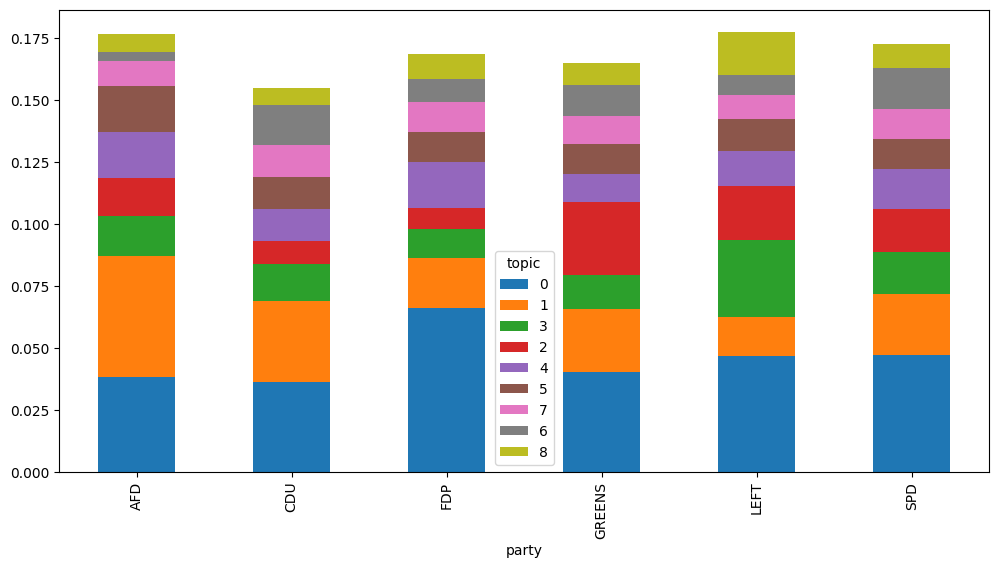

topic,0,1,3,2,4,5,7,6,8
party,,,,,,,,,
AFD,0.038415,0.048476,0.016159,0.015549,0.018598,0.018598,0.010061,0.003659,0.007317
CDU,0.036032,0.032706,0.015056,0.009473,0.012913,0.012631,0.013082,0.016014,0.007105
FDP,0.066203,0.019956,0.011924,0.008363,0.018673,0.011883,0.012297,0.009150,0.010185
GREENS,0.040180,0.025586,0.013480,0.029671,0.011103,0.012106,0.011549,0.012292,0.008801
LEFT,0.046531,0.016025,0.030922,0.021663,0.014125,0.012998,0.009852,0.008012,0.017449
SPD,0.047167,0.024740,0.016761,0.017422,0.016100,0.012040,0.011992,0.016619,0.009632


In [105]:
# Call the function
ptc_top3 = plot_top_topics(party_topic_counts, 9)
ptc_top3

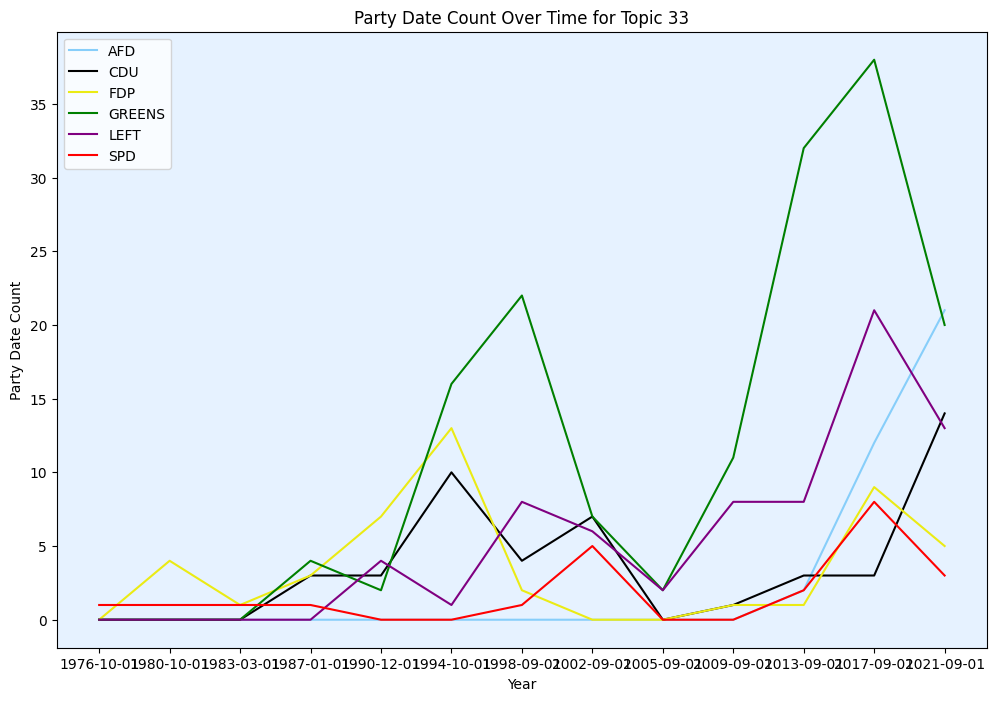

In [92]:
topic_per_party = filter_by_topic(df_manifesto, 33, party_colors)

In [52]:
df_filtered = df_manifesto[df_manifesto['topic'] == 5]
# df_filtered['party_date_count'] = df_filtered.groupby(['party', 'date'])['date'].transform('count')


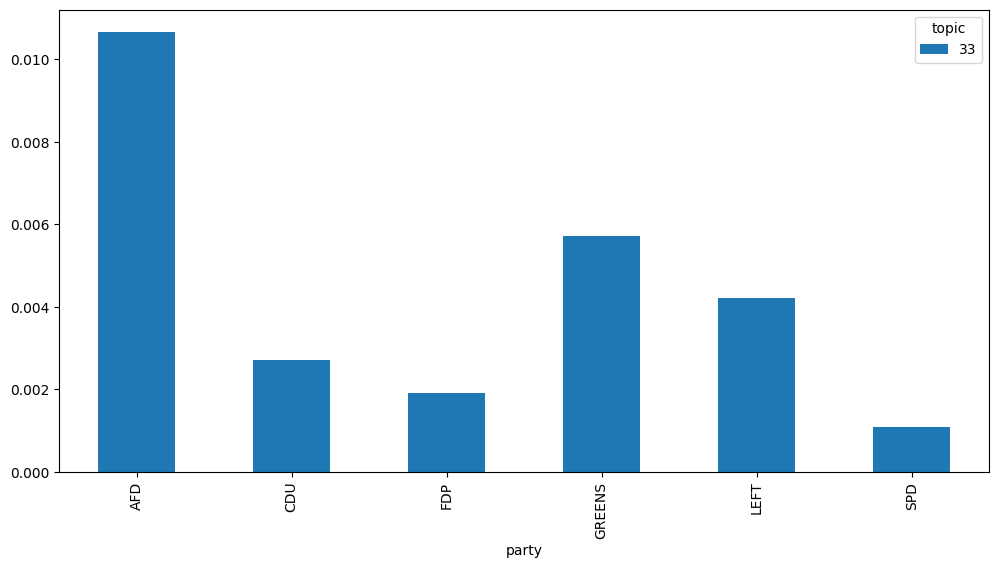

In [94]:
# Call the function with topic number 13
plot_topic_n_counts(party_topic_counts, 33)

Cluster topics into categories (e.g., Economy, Environment, Social Policy) using manual labeling or embeddings.

Analyze sentiment per topic & party (to see how parties frame topics differently):

- needs to be filtered for topic

In [96]:
df_filtered = df_manifesto[df_manifesto['topic'] == 33]


df_filtered["sentiment"] = df_filtered["text"].apply(lambda x: TextBlobDE(x).sentiment.polarity)


In [97]:
non_zero_sentiment_count = (df_filtered["sentiment"] != 0).sum()
non_zero_sentiment_count

197

In [98]:
df_pivot3 = df_filtered.pivot_table(index='date', columns='party', values='sentiment', aggfunc='sum').fillna(0)


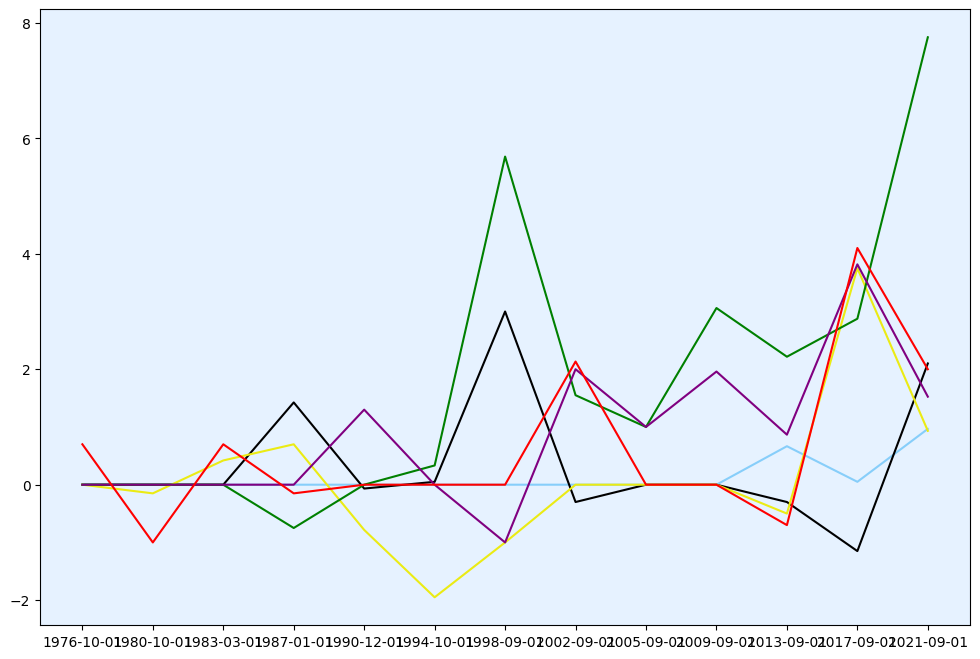

In [99]:
# Plot the data
plt.figure(figsize=(12, 8))
for party in df_pivot3.columns:
    # plt.plot(df_pivot.index, df_pivot[party], label=party)
    # if df_pivot[party].max() > 0:
    plt.plot(df_pivot3.index, df_pivot3[party], label=party, color=[c/255 for c in party_colors[party]])
    plt.gca().set_facecolor((0.9, 0.95, 1))  # Set background color to light grey/blue

Visualize Topic Evolution
Overlay different parties on a timeline to compare their topic distributions.
Heatmaps to show intensity of topics across parties and time

In [ ]:
pivot = df_manifesto.pivot_table(index="date", columns="topic", values="party", aggfunc="count")
sns.heatmap(pivot.fillna(0), cmap="coolwarm")
plt.show()

In [ ]:
topics_docs =pd.DataFrame({"topic": topics, "documents": df_manifesto["text"]})

In [ ]:
# Filter the topics_over_time DataFrame to include only the top 10 topics
top_10_topics = topics_over_time.groupby('Topic').size().nlargest(10).index
filtered_topics_over_time = topics_over_time[topics_over_time['Topic'].isin(top_10_topics)]

# Visualisiere die Themenentwicklung
topic_model.visualize_topics_over_time(topics_over_time , topics=[1,2,3,4,5,6,7,8,9,10]
)

In [ ]:
topic_model.visualize_heatmap()


In [ ]:
representation_model = KeyBERTInspired()
topic_model = BERTopic(representation_model=representation_model)

In [ ]:

ssl._create_default_https_context = ssl._create_unverified_context


#docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']



topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df_manifesto["text"])
